In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial
from misscreate import induce_mcar, induce_mar, induce_mnar


sns.set_theme()
sns.set_palette('deep')

## Load data sets

In [3]:
# load the data
df2h = pd.read_parquet('outdata/datasets/complete/data2h.parquet')
df4h = pd.read_parquet('outdata/datasets/complete/data4h.parquet')
df6h = pd.read_parquet('outdata/datasets/complete/data6h.parquet')

# list of all non-numeric columns + outcome
# these should be the same for all datasets
no_miss_cols = df2h.select_dtypes(exclude='number').columns.to_list() + ['hospital_expire_flag']

for df in [df2h, df4h, df6h]:
    df['age'] = df['age'].factorize(sort=True)[0] # factorize the age so it can be used as a conditional variable



## Baseline Analysis

First load the data, combine it into one dataframe and calculate averages from the 100 different runs.

In [4]:
# load the data
ffill_mcar = pd.read_parquet('outdata/mcar_ffill_median_res100.parquet')
ffill_mar = pd.read_parquet('outdata/mar_ffill_median_res100.parquet')
ffill_mnar = pd.read_parquet('outdata/mnar_ffill_median_res100.parquet')

ffill_mcar['missing_type'] = "MCAR"
ffill_mar['missing_type'] = "MAR"
ffill_mnar['missing_type'] = "MNAR"

# combine into baseline dataframe
df_bl = pd.concat([ffill_mcar, ffill_mar, ffill_mnar], axis=0, ignore_index=True).drop('run', axis=1)

df_bl_avg = df_bl.groupby(['missing_type', 'dataset', 'missing_pattern', 'missing_rate']).mean(numeric_only = True).reset_index()

In [5]:
print(df_bl.shape, df_bl_avg.shape)

(37800, 9) (162, 8)


### Visualizations
Divide by missing hypo first but maybe other splits are better for comparison 

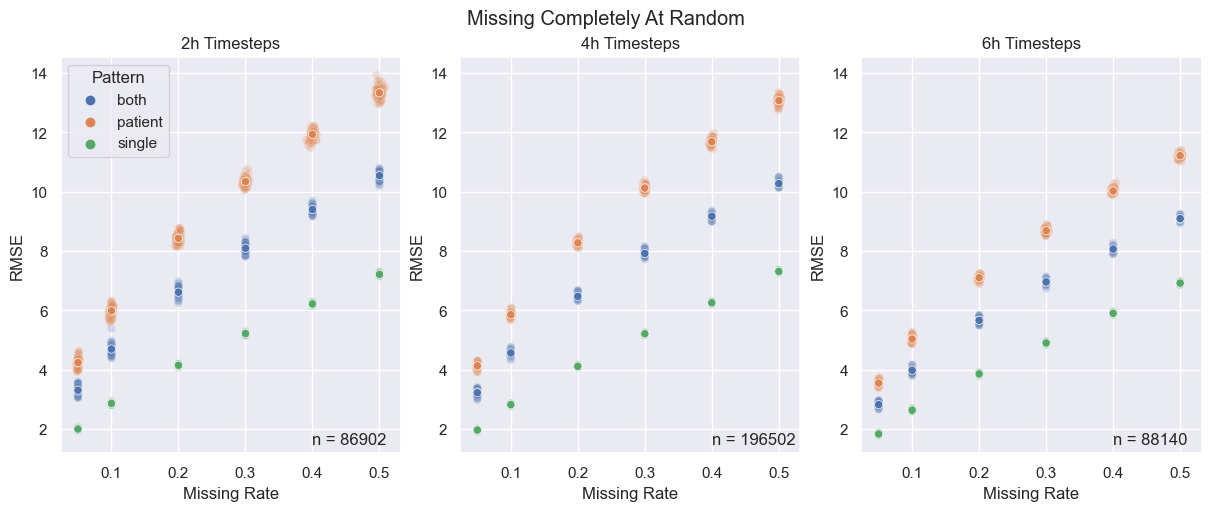

In [6]:
# MCAR
fig = plt.figure(constrained_layout=True, figsize=(12,5))
axs = fig.subplots(1,3, sharex=True, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)
    ax.set_ylabel('RMSE')
    ax.set_xlabel('Missing Rate')

# 2h
sns.scatterplot(ax=axs[0], data=df_bl[(df_bl['missing_type']== 'MCAR') & (df_bl['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[0], data=df_bl_avg[(df_bl_avg['missing_type']== 'MCAR') & ( df_bl_avg['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern')

# 4h
sns.scatterplot(ax=axs[1], data=df_bl[(df_bl['missing_type']== 'MCAR') & (df_bl['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[1], data=df_bl_avg[(df_bl_avg['missing_type']== 'MCAR') & ( df_bl_avg['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)

# 6h
sns.scatterplot(ax=axs[2], data=df_bl[(df_bl['missing_type']== 'MCAR') & (df_bl['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[2], data=df_bl_avg[(df_bl_avg['missing_type']== 'MCAR') & ( df_bl_avg['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)


plt.suptitle('Missing Completely At Random')

axs[0].legend(title='Pattern')
axs[0].set_title('2h Timesteps')
axs[0].text(0.4,1.5,f"n = {len(df2h)}")

axs[1].set_title('4h Timesteps')
axs[1].text(0.4,1.5,f"n = {len(df4h)} ")

axs[2].set_title('6h Timesteps')
axs[2].text(0.4,1.5,f"n = {len(df6h)} ")


plt.show()

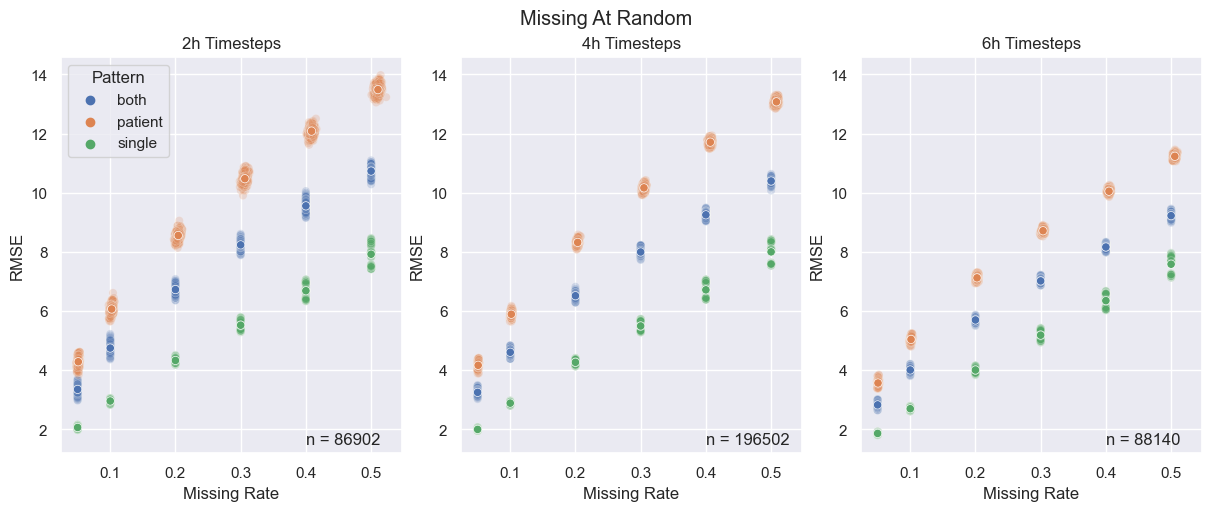

In [7]:
# MAR
fig = plt.figure(constrained_layout=True, figsize=(12,5))
axs = fig.subplots(1,3, sharex=True, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)
    ax.set_ylabel('RMSE')
    ax.set_xlabel('Missing Rate')

# 2h
sns.scatterplot(ax=axs[0], data=df_bl[(df_bl['missing_type']== 'MAR') & (df_bl['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[0], data=df_bl_avg[(df_bl_avg['missing_type']== 'MAR') & ( df_bl_avg['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern')

# 4h
sns.scatterplot(ax=axs[1], data=df_bl[(df_bl['missing_type']== 'MAR') & (df_bl['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[1], data=df_bl_avg[(df_bl_avg['missing_type']== 'MAR') & ( df_bl_avg['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)

# 6h
sns.scatterplot(ax=axs[2], data=df_bl[(df_bl['missing_type']== 'MAR') & (df_bl['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
sns.scatterplot(ax=axs[2], data=df_bl_avg[(df_bl_avg['missing_type']== 'MAR') & ( df_bl_avg['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)


plt.suptitle('Missing At Random')

axs[0].legend(title='Pattern')
axs[0].set_title('2h Timesteps')
axs[0].text(0.4,1.5,f"n = {len(df2h)}")

axs[1].set_title('4h Timesteps')
axs[1].text(0.4,1.5,f"n = {len(df4h)} ")

axs[2].set_title('6h Timesteps')
axs[2].text(0.4,1.5,f"n = {len(df6h)} ")


plt.show()

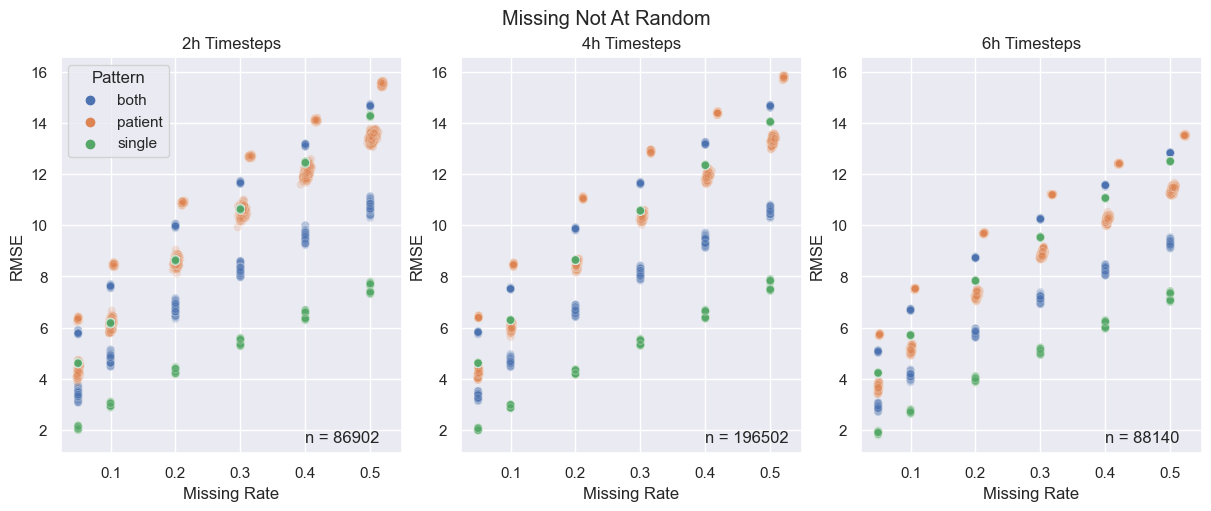

In [8]:
# MNAR
fig = plt.figure(constrained_layout=True, figsize=(12,5))
axs = fig.subplots(1,3, sharex=True, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)
    ax.set_ylabel('RMSE')
    ax.set_xlabel('Missing Rate')

# 2h
sns.scatterplot(ax=axs[0], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=True)
# sns.scatterplot(ax=axs[0], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern')

# 4h
sns.scatterplot(ax=axs[1], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
# sns.scatterplot(ax=axs[1], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)

# 6h
sns.scatterplot(ax=axs[2], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
# sns.scatterplot(ax=axs[2], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)


plt.suptitle('Missing Not At Random')

axs[0].legend(title='Pattern')
axs[0].set_title('2h Timesteps')
axs[0].text(0.4,1.5,f"n = {len(df2h)}")

axs[1].set_title('4h Timesteps')
axs[1].text(0.4,1.5,f"n = {len(df4h)} ")

axs[2].set_title('6h Timesteps')
axs[2].text(0.4,1.5,f"n = {len(df6h)} ")


plt.show()

#### Why the two distinctly different errors in MNAR?


In [9]:
# Check out only one dataset and missing rate to find the reason
mnar_error_df = pd.read_parquet('outdata/mnar_ffill_median_res100.parquet')

Seems to happen for all datasets, missing rates and missingness patterns --> only other variable is weighting (or technical error)

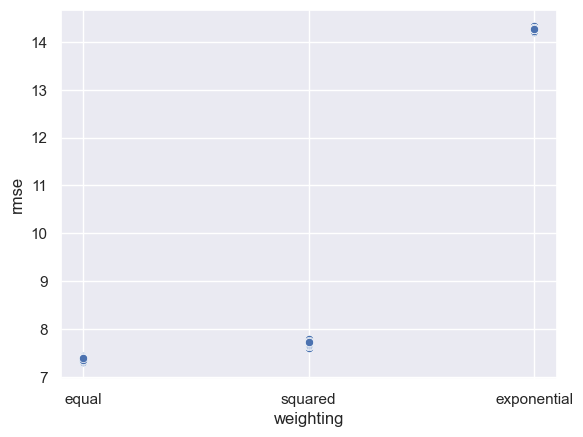

In [10]:
mnar_error_df = mnar_error_df[(mnar_error_df['dataset'] == '2h' ) & (mnar_error_df['missing_pattern'] == 'single') & (mnar_error_df['missing_rate'] == 0.5) ]
plt.figure()
sns.scatterplot(mnar_error_df, y='rmse', x='weighting')
plt.show()


Obviously the weighting has a large impact on rmse (and the other error metrics as well) mostly because the error for the exponential weighting method is so much larger.
- this is not a problem for mar (yet) because there the weighting is always done on the same variable, which is age which only has values from 0-5
- for MNAR the problem occurs because the differences between exponential values grow so much with the underlying value 

- Solutions:
    1. Only use one weighting method --> this would also widdle down the number of variables a little bit making plotting easier as well as speeding up calc times
        - or possible use multiple methods but take care that they fall within similar value ranges
    2. Normalize input values so that all variables have the same range --> this might be beneficial/necessary for possible ai later on anyways and would allow more cases to be covered
        - Unsure if this would really solve the problem

For now only plot 'equal' weighting method:


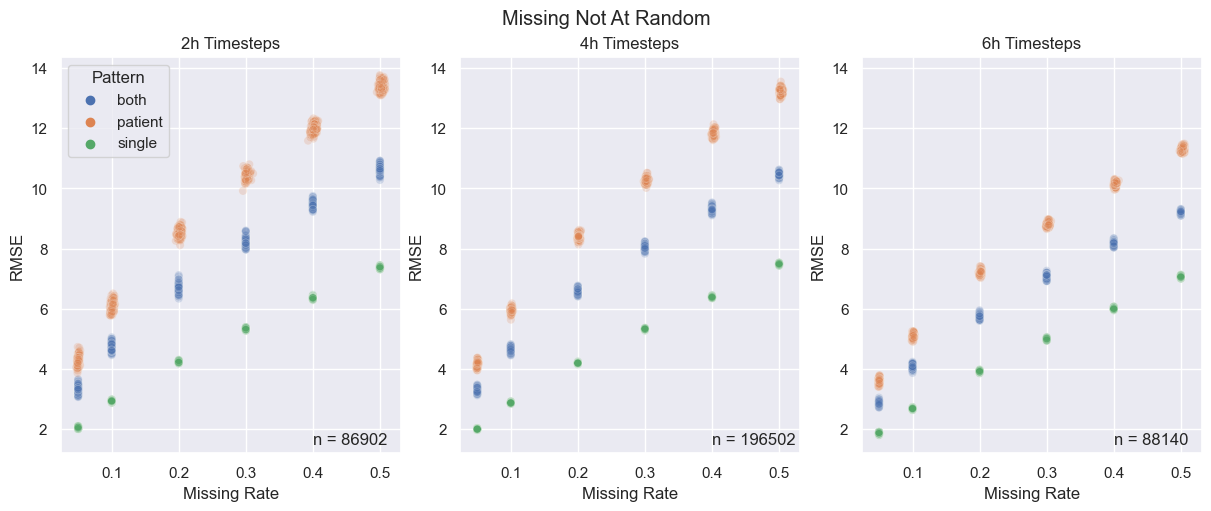

In [11]:
# MNAR
fig = plt.figure(constrained_layout=True, figsize=(12,5))
axs = fig.subplots(1,3, sharex=True, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)
    ax.set_ylabel('RMSE')
    ax.set_xlabel('Missing Rate')

# 2h
sns.scatterplot(ax=axs[0], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['weighting']== 'equal') & (df_bl['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=True)
# sns.scatterplot(ax=axs[0], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '2h')], x='missing_rate_exact', y='rmse', hue='missing_pattern')

# 4h
sns.scatterplot(ax=axs[1], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['weighting']== 'equal') & (df_bl['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
# sns.scatterplot(ax=axs[1], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '4h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)

# 6h
sns.scatterplot(ax=axs[2], data=df_bl[(df_bl['missing_type']== 'MNAR') & (df_bl['weighting']== 'equal') & (df_bl['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', alpha=0.2, legend=False)
# sns.scatterplot(ax=axs[2], data=df_bl_avg[(df_bl_avg['missing_type']== 'MNAR') & ( df_bl_avg['dataset'] == '6h')], x='missing_rate_exact', y='rmse', hue='missing_pattern', legend=False)


plt.suptitle('Missing Not At Random')

axs[0].legend(title='Pattern')
axs[0].set_title('2h Timesteps')
axs[0].text(0.4,1.5,f"n = {len(df2h)}")

axs[1].set_title('4h Timesteps')
axs[1].text(0.4,1.5,f"n = {len(df4h)} ")

axs[2].set_title('6h Timesteps')
axs[2].text(0.4,1.5,f"n = {len(df6h)} ")


plt.show()